# Notebook for https://www.kaggle.com/competitions/forecasting-mini-course-sales

In [1]:
"""
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
        
"""

'\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n        \n'

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


## 1. Data importing and checking the data

In [48]:
try:
    train_set = pd.read_csv("/kaggle/input/forecasting-mini-course-sales/train.csv")
    test_set = pd.read_csv("/kaggle/input/forecasting-mini-course-sales/test.csv")
    submission_set = pd.read_csv("/kaggle/input/forecasting-mini-course-sales/submission.csv")
except:
    train_set = pd.read_csv("train.csv")
    test_set = pd.read_csv("test.csv")
    submission_set = pd.read_csv("submission.csv")

train_set['date'] = pd.to_datetime(train_set['date'])
test_set['date'] = pd.to_datetime(test_set['date'])

display(train_set.head())
display(test_set.head())
display(submission_set.head())


,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


,id,num_sold
0,136950,100
1,136951,100
2,136952,100
3,136953,100
4,136954,100


In [4]:
# Check for NaN values in train_set
nan_in_train = train_set.isna().any().any()

print("NaN values in train_set:", nan_in_train)

# Define the columns of interest
columns_of_interest = ['country', 'store', 'product']

# Iterate over the columns and print the number of unique values and their counts
for column in columns_of_interest:
    counts = train_set[column].value_counts()
    print(f"Number of unique {column}s and corresponding counts:")
    print(counts)
    print()

NaN values in train_set: False
Number of unique countrys and corresponding counts:
country
Argentina    27390
Canada       27390
Estonia      27390
Japan        27390
Spain        27390
Name: count, dtype: int64

Number of unique stores and corresponding counts:
store
Kaggle Learn    45650
Kaggle Store    45650
Kagglazon       45650
Name: count, dtype: int64

Number of unique products and corresponding counts:
product
Using LLMs to Improve Your Coding                 27390
Using LLMs to Train More LLMs                     27390
Using LLMs to Win Friends and Influence People    27390
Using LLMs to Win More Kaggle Competitions        27390
Using LLMs to Write Better                        27390
Name: count, dtype: int64



### the distribution is even and there are no NaN values in the dataframe, data is clean

## 2. How does one time series look like

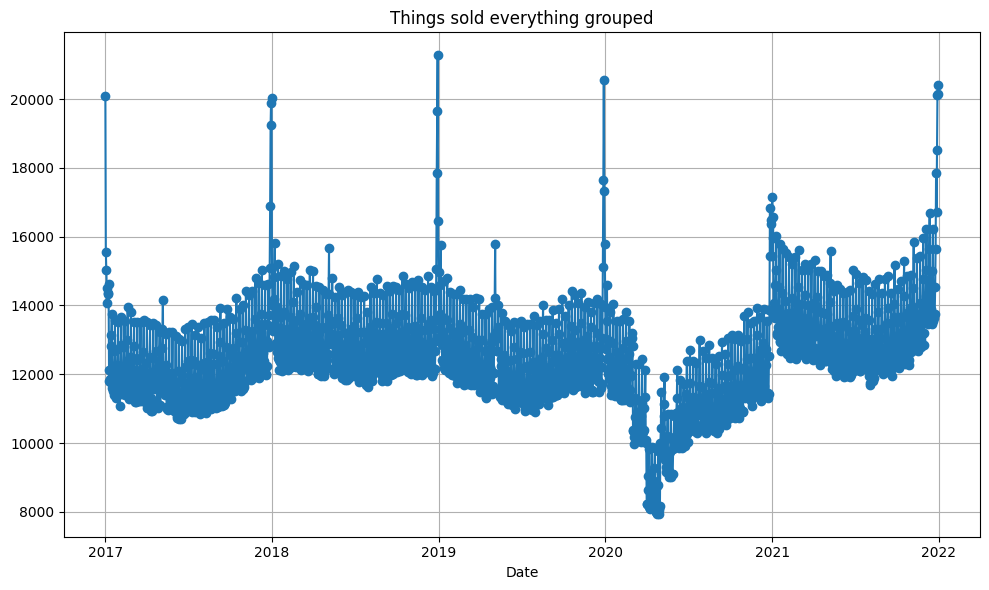

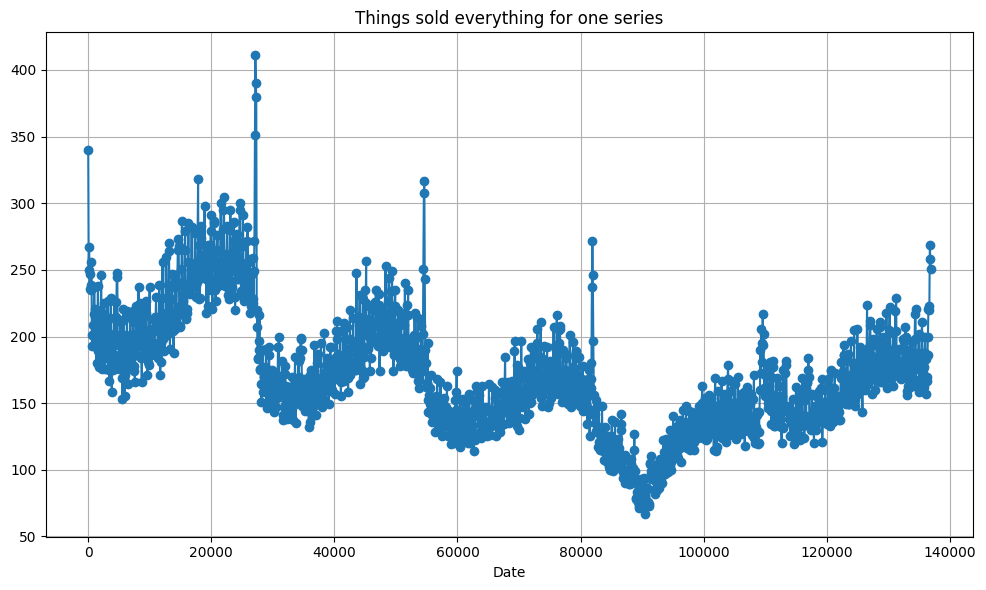

In [5]:
groups = train_set.groupby(['date']).sum()
axes = np.arange(len(groups.index))

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(groups.index, groups['num_sold'], marker='o', linestyle='-')  # Plot the data
plt.xlabel('Date')  # Set the x-axis label
#plt.ylabel('Value')  # Set the y-axis label
plt.title('Things sold everything grouped')  # Set the title
plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

groups = train_set.groupby(['store','country','product'])

for name, group in groups:
    break
axes = np.arange(len(group.index))

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(group.index, group['num_sold'], marker='o', linestyle='-')  # Plot the data
plt.xlabel('Date')  # Set the x-axis label
#plt.ylabel('Value')  # Set the y-axis label
plt.title('Things sold everything for one series')  # Set the title
plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

## Creating models and validating them

### Use simple models like linear regression and naive methods

100%|██████████| 75/75 [00:00<00:00, 280.42it/s]


the mean of the smape with linear regression:  23.838352305040715
the mean of the mape with linear regression:  0.20004317606453384
the mean of the mae with linear regression:  31.982956408118213


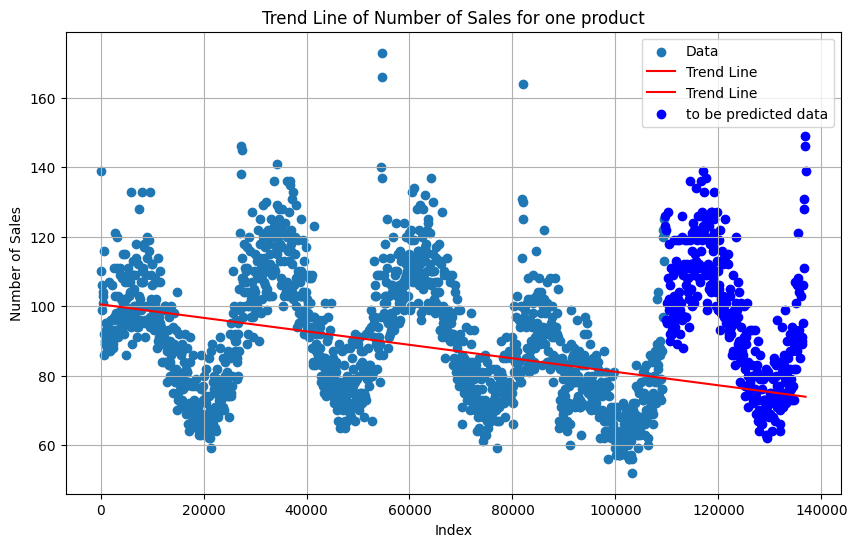

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from tqdm import tqdm

def smape(A, F):
    with np.errstate(divide='ignore', invalid='ignore'):
        tmp = 2 * np.abs(F-A) / (np.abs(A) + np.abs(F))
    tmp[np.isnan(tmp)] = 0
    return np.sum(tmp) / len(tmp) * 100

mape_list = []
mae_list = []
smape_list = []

grouped_df = train_set.groupby(by=['country','store','product'])
for name, group in tqdm(grouped_df):
    train = group.iloc[:-365]
    test = group.iloc[-365:]
    X = pd.Series(train['num_sold']).index.to_numpy().reshape(-1, 1)  # Convert index to numpy array and reshape
    y = pd.Series(train['num_sold']).values

    model = LinearRegression()
    model.fit(X, y)
    trend_line = model.predict(X)

    X_test = pd.Series(test['num_sold']).index.to_numpy().reshape(-1, 1)  # Convert index to numpy array and reshape
    trend_line_forecast = model.predict(X_test)
    y_test = pd.Series(test['num_sold']).values
    smape_list.append(smape(y_test,trend_line_forecast))
    mape_list.append(mean_absolute_percentage_error(y_test,trend_line_forecast))
    mae_list.append(mean_absolute_error(y_test,trend_line_forecast))


print("the mean of the smape with linear regression: ",np.mean(smape_list))
print("the mean of the mape with linear regression: ",np.mean(mape_list))
print("the mean of the mae with linear regression: ",np.mean(mae_list))

# Plot the data and the trend line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, trend_line, label='Trend Line', color='red')
plt.plot(X_test, trend_line_forecast, label='Trend Line', color='red')
plt.scatter(X_test, y_test, label='to be predicted data',color='blue')

plt.xlabel('Index')
plt.ylabel('Number of Sales')
plt.title('Trend Line of Number of Sales for one product')
plt.legend()
plt.grid(True)
plt.show()


Using naive forecasting, let the sales be the same as a year before

100%|██████████| 75/75 [00:00<00:00, 208.52it/s]


the mean of the smape with naive forecasting:  21.764474417549273
the mean of the mape with naive forecasting:  0.19077739097208157
the mean of the mae with naive forecasting:  33.618557077625574
the mean of the smape with naive forecasting and smoothing:  20.799054706799613
the mean of the mape with naive forecasting and smoothing:  0.18251674989101574
the mean of the mae with naive forecasting and smoothing:  32.62585877779758


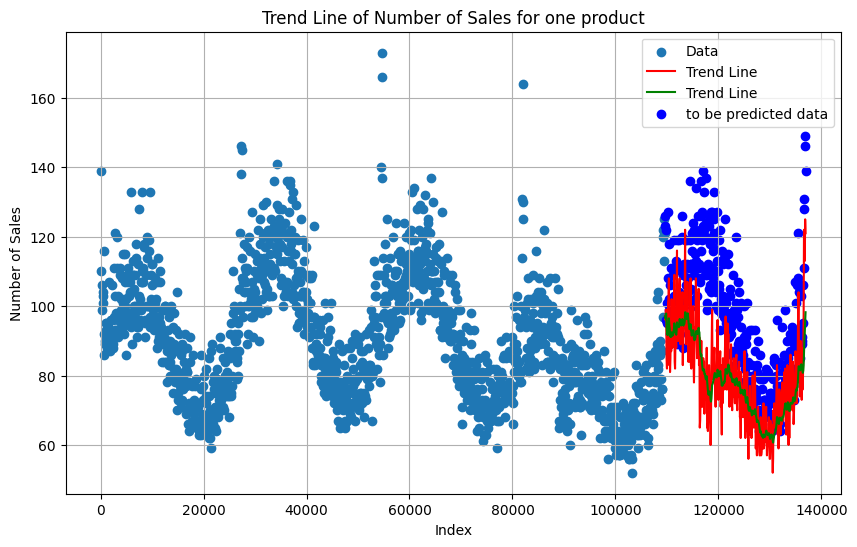

In [7]:
mape_list = []
mae_list = []
smape_list = []

mape_list_smooth = []
mae_list_smooth = []
smape_list_smooth = []

grouped_df = train_set.groupby(by=['country','store','product'])
for name, group in tqdm(grouped_df):
    #creating frames for validation and training
    train = group.iloc[:-365]
    test = group.iloc[-365:]    
    predict = test.drop(columns=['num_sold'])

    num_sold_values = train.iloc[-365:]['num_sold']
    predict['num_sold'] = num_sold_values.values

    y_test = pd.Series(test['num_sold']).values
    y_predict = predict['num_sold'].values

    alpha = 0.1  # Smoothing factor (0 < alpha < 1)
    y_predict_smooth = pd.Series(y_predict).ewm(alpha=alpha).mean().values

    smape_list.append(smape(y_test,y_predict))
    mape_list.append(mean_absolute_percentage_error(y_test,y_predict))
    mae_list.append(mean_absolute_error(y_test,y_predict))

    smape_list_smooth.append(smape(y_test,y_predict_smooth))
    mape_list_smooth.append(mean_absolute_percentage_error(y_test,y_predict_smooth))
    mae_list_smooth.append(mean_absolute_error(y_test,y_predict_smooth))


print("the mean of the smape with naive forecasting: ",np.mean(smape_list))
print("the mean of the mape with naive forecasting: ",np.mean(mape_list))
print("the mean of the mae with naive forecasting: ",np.mean(mae_list))

print("the mean of the smape with naive forecasting and smoothing: ",np.mean(smape_list_smooth))
print("the mean of the mape with naive forecasting and smoothing: ",np.mean(mape_list_smooth))
print("the mean of the mae with naive forecasting and smoothing: ",np.mean(mae_list_smooth))

# Plot the data and the trend line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_test, y_predict, label='Trend Line', color='red')
plt.plot(X_test, y_predict_smooth, label='Trend Line', color='green')
plt.scatter(X_test, y_test, label='to be predicted data',color='blue')

plt.xlabel('Index')
plt.ylabel('Number of Sales')
plt.title('Trend Line of Number of Sales for one product')
plt.legend()
plt.grid(True)
plt.show()


## Maybe a randomforest will work? 

In [8]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
rfc_train_set = train_set.copy()
# Extract day, month, and year
rfc_train_set['day'] = rfc_train_set['date'].dt.day
rfc_train_set['month'] = rfc_train_set['date'].dt.month
rfc_train_set['year'] = rfc_train_set['date'].dt.year

# Get the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
rfc_train_set['day_of_week'] = rfc_train_set['date'].dt.dayofweek
#rfc_train_set.drop(columns = ['country','store','product','date'],inplace=True)

rfc_train_set['product'] = LE.fit_transform(rfc_train_set['product'])
rfc_train_set['country'] = LE.fit_transform(rfc_train_set['country'])
rfc_train_set['store'] = LE.fit_transform(rfc_train_set['store'])

rfc_train_set.drop(columns=['id','date'],inplace=True)

the mean of the smape with linear regression:  23.559276714595757
the mean of the mape with linear regression:  0.2577795657538783
the mean of the mae with linear regression:  38.79513667682191


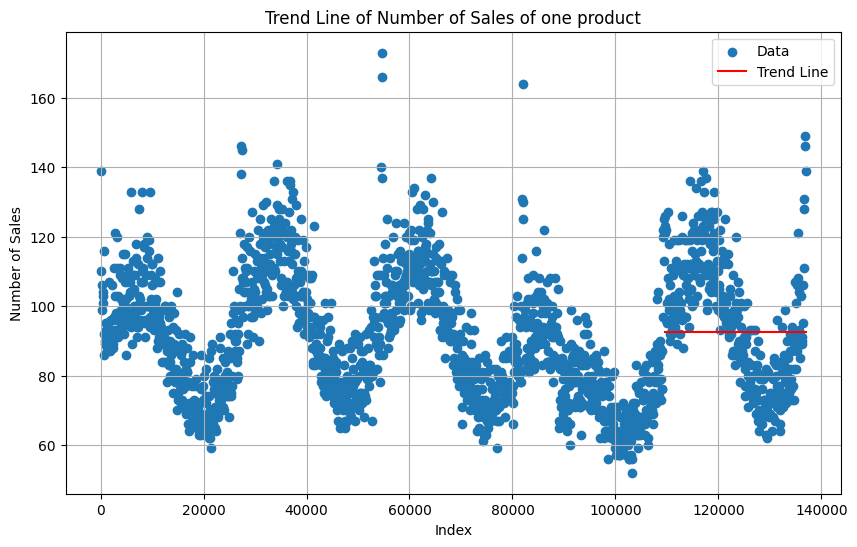

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle

train = shuffle(rfc_train_set.loc[rfc_train_set['year']!=2021])
val = rfc_train_set.loc[rfc_train_set['year']==2021]


X_train = train.drop(columns=['num_sold'])
y_train = train['num_sold']

X_val = val.drop(columns=['num_sold'])
y_val = val['num_sold']

model = RandomForestRegressor(max_depth=4, random_state=0)
model.fit(X_train,y_train)

preds = model.predict(X_val)


smape_score = smape(preds,y_val.values)
mae = mean_absolute_error(preds,y_val.values)
mape = mean_absolute_percentage_error(preds,y_val.values)

print("the mean of the smape with linear regression: ",smape_score)
print("the mean of the mape with linear regression: ",mape)
print("the mean of the mae with linear regression: ",mae)

X_val['num_sold'] = preds
groups = X_val.groupby(['product','country','store'])
for name, group in groups:
    X_val_group = group

groups = rfc_train_set.groupby(['product','country','store'])
for name, group in groups:
    train_set_group = group


# Plot the data and the trend line
plt.figure(figsize=(10, 6))
plt.scatter(train_set_group.index, train_set_group['num_sold'], label='Data')
plt.plot(X_val_group.index, X_val_group['num_sold'], label='Trend Line', color='red')
plt.xlabel('Index')
plt.ylabel('Number of Sales')
plt.title('Trend Line of Number of Sales of one product')
plt.legend()
plt.grid(True)
plt.show()


Maybe add the last 5 

the mean of the smape with linear regression:  23.558246020446674
the mean of the mape with linear regression:  0.25776457561941407
the mean of the mae with linear regression:  38.800145482601266


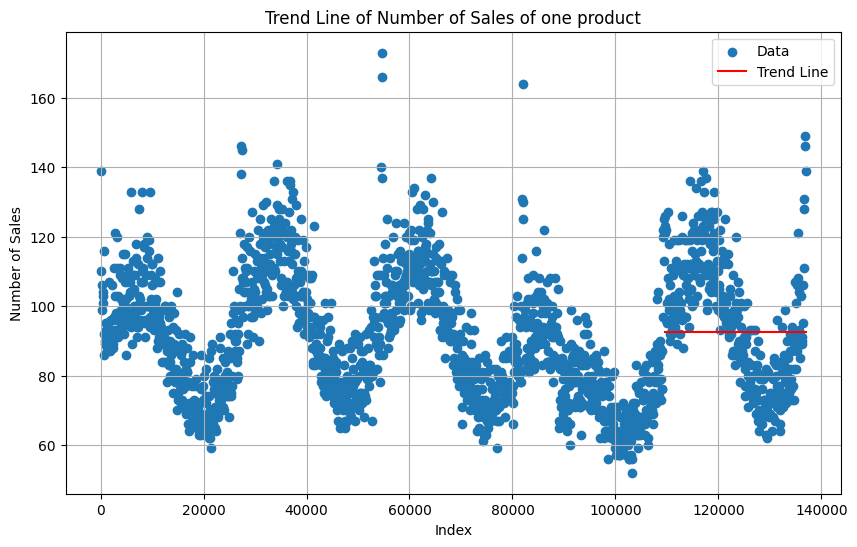

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle

train = shuffle(rfc_train_set.loc[rfc_train_set['year']!=2021])
val = rfc_train_set.loc[rfc_train_set['year']==2021]


X_train = train.drop(columns=['num_sold'])
y_train = train['num_sold']

X_val = val.drop(columns=['num_sold'])
y_val = val['num_sold']

model = RandomForestRegressor(max_depth=4, random_state=0)
model.fit(X_train,y_train)

preds = model.predict(X_val)


smape_score = smape(preds,y_val.values)
mae = mean_absolute_error(preds,y_val.values)
mape = mean_absolute_percentage_error(preds,y_val.values)

print("the mean of the smape with linear regression: ",smape_score)
print("the mean of the mape with linear regression: ",mape)
print("the mean of the mae with linear regression: ",mae)

X_val['num_sold'] = preds
groups = X_val.groupby(['product','country','store'])
for name, group in groups:
    X_val_group = group

groups = rfc_train_set.groupby(['product','country','store'])
for name, group in groups:
    train_set_group = group


# Plot the data and the trend line
plt.figure(figsize=(10, 6))
plt.scatter(train_set_group.index, train_set_group['num_sold'], label='Data')
plt.plot(X_val_group.index, X_val_group['num_sold'], label='Trend Line', color='red')
plt.xlabel('Index')
plt.ylabel('Number of Sales')
plt.title('Trend Line of Number of Sales of one product')
plt.legend()
plt.grid(True)
plt.show()


## Try LSTM

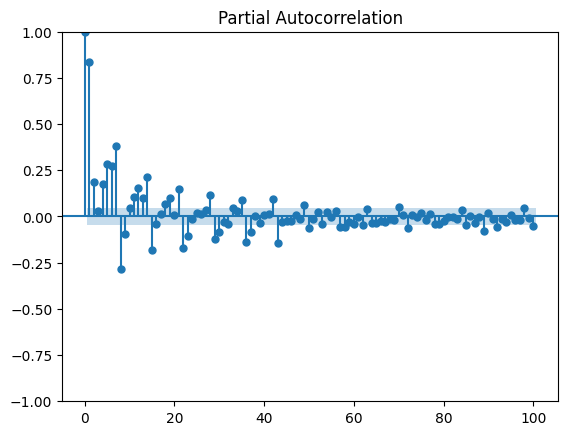

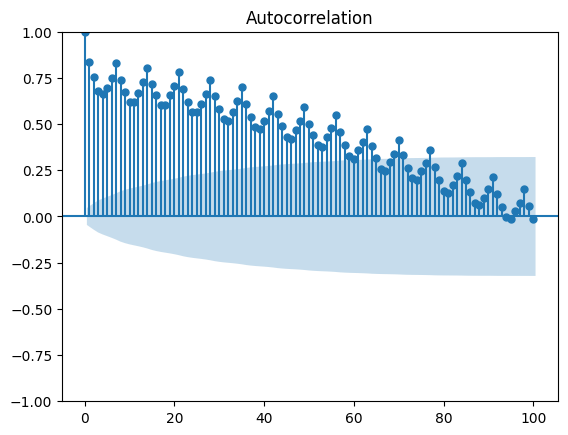

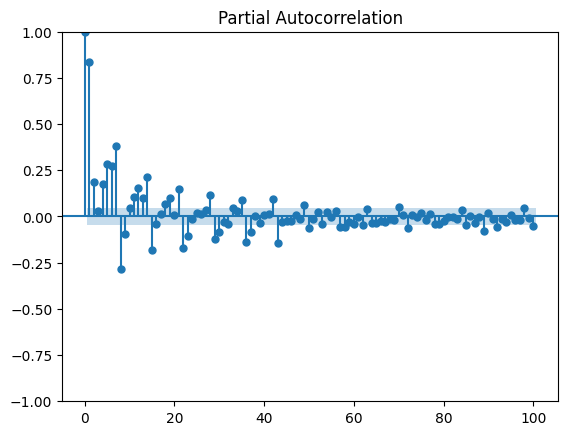

In [11]:
import statsmodels.api as sm

#For getting the lag
sm.graphics.tsa.plot_acf(train_set_group['num_sold'].values, lags=100)
sm.graphics.tsa.plot_pacf(train_set_group['num_sold'].values, lags=100)

  0%|          | 0/75 [00:00<?, ?it/s]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.2517 - val_loss: 0.1311
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1636 - val_loss: 0.1029
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1172 - val_loss: 0.1143
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1095 - val_loss: 0.1316
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1059 - val_loss: 0.1129
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.2965 - val_loss: 0.1778
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.1330 - val_loss: 0.1370
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0944 - val_loss: 0.1311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


  1%|▏         | 1/75 [00:09<12:05,  9.80s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.2540 - val_loss: 0.0850
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1612 - val_loss: 0.0956
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0982 - val_loss: 0.1173
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0825 - val_loss: 0.1299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.2604 - val_loss: 0.1489
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.1163 - val_loss: 0.0995
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0807 - val_loss: 0.0604
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0750 - val_loss: 0.0577
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0707 - val_loss: 0.0465
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0700 - val_loss: 0.0475
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0703 - val_loss: 0.0463
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━

  3%|▎         | 2/75 [00:27<17:31, 14.40s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.2430 - val_loss: 0.1268
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1460 - val_loss: 0.0950
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0975 - val_loss: 0.0964
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0856 - val_loss: 0.1096
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0820 - val_loss: 0.1163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.2902 - val_loss: 0.1526
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1226 - val_loss: 0.1084
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0802 - val_loss: 0.0798
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0701 - val_loss: 0.0500
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0662 - val_loss: 0.0474
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0662 - val_loss: 0.0475
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━

  4%|▍         | 3/75 [00:44<18:56, 15.78s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.2316 - val_loss: 0.0997
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1506 - val_loss: 0.0785
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0959 - val_loss: 0.0810
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0861 - val_loss: 0.0932
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0837 - val_loss: 0.0937
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.2566 - val_loss: 0.1298
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1159 - val_loss: 0.0798
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0783 - val_loss: 0.0824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


  5%|▌         | 4/75 [00:57<17:01, 14.38s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.2993 - val_loss: 0.1464
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1785 - val_loss: 0.0986
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1142 - val_loss: 0.1006
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1025 - val_loss: 0.0963
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1004 - val_loss: 0.0880
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0981 - val_loss: 0.0906
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0979 - val_loss: 0.0902
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0984 - val_loss: 0.0864
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0975 - val_loss: 0.0866
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0973 - val_loss: 0.0849
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0973 - val_loss: 0.0857
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0969 - val_loss: 0.0837


  7%|▋         | 5/75 [01:15<18:34, 15.93s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.3040 - val_loss: 0.1512
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1959 - val_loss: 0.1184
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.1349 - val_loss: 0.1558
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.1249 - val_loss: 0.1415
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.1226 - val_loss: 0.1332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.3413 - val_loss: 0.2074
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1630 - val_loss: 0.1608
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1106 - val_loss: 0.1453
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


  8%|▊         | 6/75 [01:30<17:43, 15.41s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.2881 - val_loss: 0.1008
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1758 - val_loss: 0.1033
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1053 - val_loss: 0.1348
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0880 - val_loss: 0.1469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.2821 - val_loss: 0.1558
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1232 - val_loss: 0.1012
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0889 - val_loss: 0.0755
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0787 - val_loss: 0.0498
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0773 - val_loss: 0.0502
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0769 - val_loss: 0.0546
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0760 - val_loss: 0.0501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200m

  9%|▉         | 7/75 [01:45<17:16, 15.24s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.2259 - val_loss: 0.1088
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1385 - val_loss: 0.1017
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0928 - val_loss: 0.1097
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0855 - val_loss: 0.1223
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0831 - val_loss: 0.1230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.2526 - val_loss: 0.1241
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1199 - val_loss: 0.0710
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0822 - val_loss: 0.0740
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0761 - val_loss: 0.0554
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0721 - val_loss: 0.0431
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0711 - val_loss: 0.0424
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━

 11%|█         | 8/75 [02:02<17:57, 16.08s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.2158 - val_loss: 0.1046
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1295 - val_loss: 0.0778
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0884 - val_loss: 0.0759
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0823 - val_loss: 0.0861
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0799 - val_loss: 0.0901
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0790 - val_loss: 0.0864
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.2543 - val_loss: 0.1555
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1165 - val_loss: 0.1049
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0757 - val_loss: 0.0968
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


 12%|█▏        | 9/75 [02:17<17:16, 15.71s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.2983 - val_loss: 0.1426
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1838 - val_loss: 0.0945
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1120 - val_loss: 0.1042
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0985 - val_loss: 0.0897
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0952 - val_loss: 0.0872
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0941 - val_loss: 0.0892
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0933 - val_loss: 0.0878
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0933 - val_loss: 0.0825
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0934 - val_loss: 0.0820
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0923 - val_loss: 0.0825
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0922 - val_loss: 0.0809
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0921 - val_loss: 0.0782
E

 13%|█▎        | 10/75 [02:34<17:29, 16.14s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.2685 - val_loss: 0.1475
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1720 - val_loss: 0.1101
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1256 - val_loss: 0.1267
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1180 - val_loss: 0.1362
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1160 - val_loss: 0.1284
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.3239 - val_loss: 0.2161
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1585 - val_loss: 0.1448
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1059 - val_loss: 0.1167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


 15%|█▍        | 11/75 [02:47<16:09, 15.15s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 0.2485 - val_loss: 0.0817
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1529 - val_loss: 0.0898
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0920 - val_loss: 0.1148
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0791 - val_loss: 0.1239
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.2604 - val_loss: 0.1202
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.1129 - val_loss: 0.0677
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0770 - val_loss: 0.0610
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0696 - val_loss: 0.0453
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0670 - val_loss: 0.0446
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0659 - val_loss: 0.0445
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0656 - val_loss: 0.0451
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━

 16%|█▌        | 12/75 [03:08<17:34, 16.73s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.2209 - val_loss: 0.1280
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1319 - val_loss: 0.1008
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0889 - val_loss: 0.0988
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0812 - val_loss: 0.1030
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0794 - val_loss: 0.1095
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0783 - val_loss: 0.1095
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.2733 - val_loss: 0.1528
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1188 - val_loss: 0.1086
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0779 - val_loss: 0.0751
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0702 - val_loss: 0.0604
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0655 - val_loss: 0.0468
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 

 17%|█▋        | 13/75 [03:29<18:35, 18.00s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.2233 - val_loss: 0.0937
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1383 - val_loss: 0.0705
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0864 - val_loss: 0.0713
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0763 - val_loss: 0.0759
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0741 - val_loss: 0.0850
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.2455 - val_loss: 0.1097
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1020 - val_loss: 0.0789
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0701 - val_loss: 0.0796
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


 19%|█▊        | 14/75 [03:42<17:02, 16.76s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - loss: 0.3065 - val_loss: 0.1430
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1820 - val_loss: 0.1038
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.1207 - val_loss: 0.1112
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1098 - val_loss: 0.1004
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1070 - val_loss: 0.0969
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1049 - val_loss: 0.1002
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1046 - val_loss: 0.0941
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1043 - val_loss: 0.0927
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1042 - val_loss: 0.0935
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1036 - val_loss: 0.0916
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1027 - val_loss: 0.0900
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1022 - val_loss: 0.0903


 20%|██        | 15/75 [04:02<17:35, 17.59s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.2507 - val_loss: 0.1615
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1590 - val_loss: 0.1142
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1132 - val_loss: 0.1190
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1038 - val_loss: 0.1185
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1014 - val_loss: 0.1140
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1009 - val_loss: 0.1120
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0998 - val_loss: 0.1107
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0998 - val_loss: 0.1090
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0989 - val_loss: 0.1076
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0989 - val_loss: 0.1047
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0960 - val_loss: 0.0947
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0924 - val_loss: 0.0866


 21%|██▏       | 16/75 [04:20<17:20, 17.64s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.2741 - val_loss: 0.1417
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1640 - val_loss: 0.0955
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1071 - val_loss: 0.1092
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0953 - val_loss: 0.1044
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0923 - val_loss: 0.0929
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0912 - val_loss: 0.1029
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0909 - val_loss: 0.0976
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0902 - val_loss: 0.0946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.3282 - val_loss: 0.1885
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1381 - val_loss: 0.1121
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0887 - val_loss: 0.1025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
33/

 23%|██▎       | 17/75 [04:34<16:08, 16.70s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.2365 - val_loss: 0.1408
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.1429 - val_loss: 0.0897
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0921 - val_loss: 0.0847
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0820 - val_loss: 0.0908
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0802 - val_loss: 0.0891
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0791 - val_loss: 0.0837
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0783 - val_loss: 0.0844
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0779 - val_loss: 0.0833
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0781 - val_loss: 0.0835
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0778 - val_loss: 0.0845
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0777 - val_loss: 0.0817
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0778 - val_loss: 0.0820


 24%|██▍       | 18/75 [04:53<16:25, 17.29s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.2206 - val_loss: 0.1514
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1402 - val_loss: 0.1102
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0990 - val_loss: 0.1071
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0929 - val_loss: 0.1052
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0911 - val_loss: 0.1027
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0901 - val_loss: 0.1035
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0897 - val_loss: 0.1035
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0890 - val_loss: 0.1026
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0889 - val_loss: 0.1023
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0884 - val_loss: 0.1024
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0878 - val_loss: 0.0998
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0853 - val_loss: 0.1017


 25%|██▌       | 19/75 [05:10<16:10, 17.33s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.2987 - val_loss: 0.2272
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.2027 - val_loss: 0.1700
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1458 - val_loss: 0.1756
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1366 - val_loss: 0.1707
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1336 - val_loss: 0.1697
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1332 - val_loss: 0.1678
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1325 - val_loss: 0.1606
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1254 - val_loss: 0.1371
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1202 - val_loss: 0.1191
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1116 - val_loss: 0.1107
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1089 - val_loss: 0.1069
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1056 - val_loss: 0.1068


 27%|██▋       | 20/75 [05:31<16:39, 18.18s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.2474 - val_loss: 0.1628
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1570 - val_loss: 0.1099
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1074 - val_loss: 0.1131
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0980 - val_loss: 0.1109
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0959 - val_loss: 0.1076
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0946 - val_loss: 0.1065
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0939 - val_loss: 0.1045
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0928 - val_loss: 0.1035
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0909 - val_loss: 0.0963
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0883 - val_loss: 0.0876
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0847 - val_loss: 0.0845
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0821 - val_loss: 0.0785
E

 28%|██▊       | 21/75 [05:49<16:25, 18.25s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.2805 - val_loss: 0.1501
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1601 - val_loss: 0.0939
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0988 - val_loss: 0.1010
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0873 - val_loss: 0.1080
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0855 - val_loss: 0.0962
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.2922 - val_loss: 0.1724
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1325 - val_loss: 0.1092
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0880 - val_loss: 0.1020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 29%|██▉       | 22/75 [06:04<15:17, 17.32s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.1930 - val_loss: 0.1078
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1230 - val_loss: 0.0804
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0852 - val_loss: 0.0806
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0765 - val_loss: 0.0889
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0747 - val_loss: 0.0820
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.2822 - val_loss: 0.1684
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1181 - val_loss: 0.0968
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0717 - val_loss: 0.0896
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 31%|███       | 23/75 [06:16<13:33, 15.64s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.2378 - val_loss: 0.1642
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1472 - val_loss: 0.1122
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0996 - val_loss: 0.1022
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0891 - val_loss: 0.1014
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0873 - val_loss: 0.1002
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0854 - val_loss: 0.0994
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0849 - val_loss: 0.0997
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0845 - val_loss: 0.0986
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0839 - val_loss: 0.0976
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0827 - val_loss: 0.0951
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0804 - val_loss: 0.0927
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0773 - val_loss: 0.0916


 32%|███▏      | 24/75 [06:35<14:08, 16.63s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.2992 - val_loss: 0.2267
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1985 - val_loss: 0.1684
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1423 - val_loss: 0.1709
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1333 - val_loss: 0.1632
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1298 - val_loss: 0.1601
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1290 - val_loss: 0.1588
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1278 - val_loss: 0.1550
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1239 - val_loss: 0.1365
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1153 - val_loss: 0.1213
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1086 - val_loss: 0.1084
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1035 - val_loss: 0.1030
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1031 - val_loss: 0.1021
E

 33%|███▎      | 25/75 [06:53<14:21, 17.24s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.2810 - val_loss: 0.1850
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1773 - val_loss: 0.1213
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1162 - val_loss: 0.1198
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1042 - val_loss: 0.1187
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1024 - val_loss: 0.1143
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1009 - val_loss: 0.1148
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1006 - val_loss: 0.1122
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0989 - val_loss: 0.1044
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0953 - val_loss: 0.0958
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0927 - val_loss: 0.0919
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0906 - val_loss: 0.0896
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0879 - val_loss: 0.0835
E

 35%|███▍      | 26/75 [07:11<14:12, 17.39s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.2336 - val_loss: 0.1259
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1447 - val_loss: 0.0907
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0969 - val_loss: 0.0948
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0864 - val_loss: 0.0998
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0846 - val_loss: 0.0963
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.2770 - val_loss: 0.1632
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1218 - val_loss: 0.1050
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0827 - val_loss: 0.0935
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 36%|███▌      | 27/75 [07:24<12:52, 16.09s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.2358 - val_loss: 0.1299
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1373 - val_loss: 0.0852
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0871 - val_loss: 0.0821
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0798 - val_loss: 0.0865
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0775 - val_loss: 0.0852
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0764 - val_loss: 0.0835
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.2885 - val_loss: 0.1769
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1261 - val_loss: 0.1158
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0782 - val_loss: 0.1072
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 37%|███▋      | 28/75 [07:39<12:14, 15.62s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.2352 - val_loss: 0.1683
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1510 - val_loss: 0.1080
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1010 - val_loss: 0.1031
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0907 - val_loss: 0.1063
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0891 - val_loss: 0.1006
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0876 - val_loss: 0.0994
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0869 - val_loss: 0.1004
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0867 - val_loss: 0.1001
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0864 - val_loss: 0.1007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.2910 - val_loss: 0.1788
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1287 - val_loss: 0.1356
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64

 39%|███▊      | 29/75 [07:55<12:00, 15.67s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.2639 - val_loss: 0.2019
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1785 - val_loss: 0.1587
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1322 - val_loss: 0.1591
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1241 - val_loss: 0.1567
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1224 - val_loss: 0.1532
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1190 - val_loss: 0.1516
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1210 - val_loss: 0.1496
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1167 - val_loss: 0.1291
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1056 - val_loss: 0.1077
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1020 - val_loss: 0.1023
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0979 - val_loss: 0.0984
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0950 - val_loss: 0.0963
E

 40%|████      | 30/75 [08:13<12:19, 16.43s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.2798 - val_loss: 0.2220
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1826 - val_loss: 0.1229
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1074 - val_loss: 0.1080
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0917 - val_loss: 0.1049
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0882 - val_loss: 0.0996
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0866 - val_loss: 0.0978
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0862 - val_loss: 0.0996
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0866 - val_loss: 0.0993
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0861 - val_loss: 0.0984
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.3333 - val_loss: 0.2019
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1404 - val_loss: 0.1263
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 6

 41%|████▏     | 31/75 [08:30<12:14, 16.68s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.2619 - val_loss: 0.1529
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1566 - val_loss: 0.0860
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0972 - val_loss: 0.0986
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0867 - val_loss: 0.0772
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0820 - val_loss: 0.0774
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0803 - val_loss: 0.0768
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0797 - val_loss: 0.0750
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0795 - val_loss: 0.0769
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0789 - val_loss: 0.0756
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0789 - val_loss: 0.0720
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0790 - val_loss: 0.0774
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0787 - val_loss: 0.0750


 43%|████▎     | 32/75 [08:47<12:06, 16.89s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.2491 - val_loss: 0.1597
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1564 - val_loss: 0.0870
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0980 - val_loss: 0.0866
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0855 - val_loss: 0.0818
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0836 - val_loss: 0.0751
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0821 - val_loss: 0.0768
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0816 - val_loss: 0.0756
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0816 - val_loss: 0.0743
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0812 - val_loss: 0.0737
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0813 - val_loss: 0.0752
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0812 - val_loss: 0.0771
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0808 - val_loss: 0.0725
E

 44%|████▍     | 33/75 [09:08<12:31, 17.89s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.1867 - val_loss: 0.1375
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1154 - val_loss: 0.0861
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0751 - val_loss: 0.0783
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0673 - val_loss: 0.0774
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0658 - val_loss: 0.0769
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0652 - val_loss: 0.0746
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0650 - val_loss: 0.0748
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0644 - val_loss: 0.0760
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0642 - val_loss: 0.0750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.2115 - val_loss: 0.1279
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0960 - val_loss: 0.0901
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71

 45%|████▌     | 34/75 [09:23<11:40, 17.08s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.2975 - val_loss: 0.2689
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.2155 - val_loss: 0.1823
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1500 - val_loss: 0.1847
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1371 - val_loss: 0.1797
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1349 - val_loss: 0.1779
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1308 - val_loss: 0.1770
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1304 - val_loss: 0.1674
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1253 - val_loss: 0.1428
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.1165 - val_loss: 0.1293
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.1116 - val_loss: 0.1264
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1087 - val_loss: 0.1171
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1072 - val_loss: 0.1078


 47%|████▋     | 35/75 [09:41<11:38, 17.46s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.2778 - val_loss: 0.2101
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1750 - val_loss: 0.1181
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1034 - val_loss: 0.1011
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0877 - val_loss: 0.0945
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0850 - val_loss: 0.0916
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0834 - val_loss: 0.0932
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0829 - val_loss: 0.0928
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0824 - val_loss: 0.0916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.3021 - val_loss: 0.1966
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1366 - val_loss: 0.1240
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0894 - val_loss: 0.1145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
33/

 48%|████▊     | 36/75 [09:57<11:05, 17.07s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.2301 - val_loss: 0.1333
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1429 - val_loss: 0.0756
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0919 - val_loss: 0.0720
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0804 - val_loss: 0.0872
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0781 - val_loss: 0.0691
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0762 - val_loss: 0.0677
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0753 - val_loss: 0.0705
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0753 - val_loss: 0.0722
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0746 - val_loss: 0.0677
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0742 - val_loss: 0.0675
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0725 - val_loss: 0.0683
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0705 - val_loss: 0.0669


 49%|████▉     | 37/75 [10:17<11:15, 17.78s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.2719 - val_loss: 0.1752
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1639 - val_loss: 0.0917
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1000 - val_loss: 0.0808
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0871 - val_loss: 0.0810
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0849 - val_loss: 0.0744
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0834 - val_loss: 0.0715
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0831 - val_loss: 0.0742
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0828 - val_loss: 0.0726
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0828 - val_loss: 0.0725
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.2617 - val_loss: 0.1589
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1247 - val_loss: 0.0906
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64

 51%|█████     | 38/75 [10:33<10:36, 17.21s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.1844 - val_loss: 0.1344
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1134 - val_loss: 0.0889
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0765 - val_loss: 0.0830
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0701 - val_loss: 0.0822
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0681 - val_loss: 0.0800
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0675 - val_loss: 0.0791
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0671 - val_loss: 0.0795
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0668 - val_loss: 0.0785
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0669 - val_loss: 0.0789
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0668 - val_loss: 0.0799
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0664 - val_loss: 0.0797
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms

 52%|█████▏    | 39/75 [10:49<10:12, 17.01s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.2548 - val_loss: 0.2122
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.1776 - val_loss: 0.1574
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1298 - val_loss: 0.1614
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1216 - val_loss: 0.1592
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1212 - val_loss: 0.1550
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1186 - val_loss: 0.1525
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1182 - val_loss: 0.1515
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1152 - val_loss: 0.1495
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1140 - val_loss: 0.1369
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1091 - val_loss: 0.1114
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1035 - val_loss: 0.1165
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0980 - val_loss: 0.1223


 53%|█████▎    | 40/75 [11:11<10:45, 18.46s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.2705 - val_loss: 0.2177
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1762 - val_loss: 0.1167
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1038 - val_loss: 0.1000
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0859 - val_loss: 0.0975
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0827 - val_loss: 0.0935
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0806 - val_loss: 0.0918
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0798 - val_loss: 0.0916
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0796 - val_loss: 0.0915
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0794 - val_loss: 0.0910
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0792 - val_loss: 0.0903
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0794 - val_loss: 0.0903
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0792 - val_loss: 0.0905


 55%|█████▍    | 41/75 [11:30<10:30, 18.53s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.2291 - val_loss: 0.1282
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1368 - val_loss: 0.0802
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0893 - val_loss: 0.0783
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0809 - val_loss: 0.0816
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0785 - val_loss: 0.0783
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0770 - val_loss: 0.0727
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0768 - val_loss: 0.0745
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0754 - val_loss: 0.0708
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0737 - val_loss: 0.0696
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0715 - val_loss: 0.0694
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0703 - val_loss: 0.0697
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0686 - val_loss: 0.0685


 56%|█████▌    | 42/75 [11:49<10:19, 18.78s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.2255 - val_loss: 0.1371
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1399 - val_loss: 0.0809
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0917 - val_loss: 0.0703
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0807 - val_loss: 0.0768
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0778 - val_loss: 0.0712
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0765 - val_loss: 0.0674
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0760 - val_loss: 0.0681
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0763 - val_loss: 0.0700
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0759 - val_loss: 0.0682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.2465 - val_loss: 0.1510
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1187 - val_loss: 0.0814
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5

 57%|█████▋    | 43/75 [12:05<09:34, 17.96s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.2139 - val_loss: 0.1663
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1376 - val_loss: 0.1052
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0889 - val_loss: 0.0921
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0783 - val_loss: 0.0906
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0765 - val_loss: 0.0907
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0751 - val_loss: 0.0904
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - loss: 0.0752 - val_loss: 0.0902
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0750 - val_loss: 0.0906
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0746 - val_loss: 0.0894
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0744 - val_loss: 0.0890
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0745 - val_loss: 0.0894
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0743 - val_loss: 0.0898

 59%|█████▊    | 44/75 [12:26<09:39, 18.71s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.2774 - val_loss: 0.2123
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1848 - val_loss: 0.1719
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.1358 - val_loss: 0.1702
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1264 - val_loss: 0.1671
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1267 - val_loss: 0.1630
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1248 - val_loss: 0.1635
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1233 - val_loss: 0.1607
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1240 - val_loss: 0.1575
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1184 - val_loss: 0.1383
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1124 - val_loss: 0.1137
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1053 - val_loss: 0.1294
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1008 - val_loss: 0.1177
E

 60%|██████    | 45/75 [12:46<09:34, 19.15s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.3906 - val_loss: 0.2725
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.2395 - val_loss: 0.1762
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1532 - val_loss: 0.1639
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1374 - val_loss: 0.1547
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1315 - val_loss: 0.1552
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1291 - val_loss: 0.1541
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1282 - val_loss: 0.1515
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1279 - val_loss: 0.1528
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1275 - val_loss: 0.1526
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1277 - val_loss: 0.1463
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1245 - val_loss: 0.1389
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1207 - val_loss: 0.1305


 61%|██████▏   | 46/75 [13:04<09:09, 18.94s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - loss: 0.3323 - val_loss: 0.1996
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.2116 - val_loss: 0.1249
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1244 - val_loss: 0.1316
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1103 - val_loss: 0.1087
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1058 - val_loss: 0.1140
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1036 - val_loss: 0.1108
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1033 - val_loss: 0.1102
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.3523 - val_loss: 0.2031
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.1621 - val_loss: 0.1109
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.1039 - val_loss: 0.1047
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0981 - val_loss: 0.1026
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1

 63%|██████▎   | 47/75 [13:25<09:03, 19.41s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.3324 - val_loss: 0.1935
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1908 - val_loss: 0.1238
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1190 - val_loss: 0.1220
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1046 - val_loss: 0.1110
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1007 - val_loss: 0.1117
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0989 - val_loss: 0.1108
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0986 - val_loss: 0.1095
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0982 - val_loss: 0.1100
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0981 - val_loss: 0.1102
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0983 - val_loss: 0.1107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.3726 - val_loss: 0.2121
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56

 64%|██████▍   | 48/75 [13:41<08:21, 18.56s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.2308 - val_loss: 0.1736
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1537 - val_loss: 0.1237
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1059 - val_loss: 0.1120
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0957 - val_loss: 0.1088
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0936 - val_loss: 0.1068
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0920 - val_loss: 0.1075
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0916 - val_loss: 0.1071
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0907 - val_loss: 0.1071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.2942 - val_loss: 0.1864
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1433 - val_loss: 0.1305
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0922 - val_loss: 0.1225
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
33/

 65%|██████▌   | 49/75 [13:55<07:23, 17.04s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.2402 - val_loss: 0.1834
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.1554 - val_loss: 0.1400
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.1107 - val_loss: 0.1326
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1010 - val_loss: 0.1334
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1003 - val_loss: 0.1316
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0974 - val_loss: 0.1311
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0974 - val_loss: 0.1284
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0953 - val_loss: 0.1218
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0913 - val_loss: 0.1030
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0869 - val_loss: 0.0892
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0804 - val_loss: 0.0816
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0785 - val_loss: 0.0811


 67%|██████▋   | 50/75 [14:14<07:23, 17.73s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.3544 - val_loss: 0.2764
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.2452 - val_loss: 0.1726
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1574 - val_loss: 0.1614
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1422 - val_loss: 0.1643
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1386 - val_loss: 0.1600
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1362 - val_loss: 0.1564
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1347 - val_loss: 0.1521
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1325 - val_loss: 0.1427
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1275 - val_loss: 0.1315
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1217 - val_loss: 0.1243
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1185 - val_loss: 0.1192
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1168 - val_loss: 0.1187
E

 68%|██████▊   | 51/75 [14:33<07:11, 17.97s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.3528 - val_loss: 0.2041
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.2223 - val_loss: 0.1428
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1325 - val_loss: 0.1419
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1186 - val_loss: 0.1260
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1144 - val_loss: 0.1303
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.1133 - val_loss: 0.1274
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1117 - val_loss: 0.1243
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1122 - val_loss: 0.1305
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1121 - val_loss: 0.1240
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1112 - val_loss: 0.1259
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1108 - val_loss: 0.1257
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.1097 - val_loss: 0.1237


 69%|██████▉   | 52/75 [15:00<08:00, 20.91s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.3344 - val_loss: 0.2174
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.2089 - val_loss: 0.1271
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1194 - val_loss: 0.1198
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1058 - val_loss: 0.1071
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1013 - val_loss: 0.1101
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0998 - val_loss: 0.1089
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0992 - val_loss: 0.1091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.3838 - val_loss: 0.2129
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1615 - val_loss: 0.1137
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0988 - val_loss: 0.1041
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0905 - val_loss: 0.1023
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1

 71%|███████   | 53/75 [15:19<07:26, 20.27s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.2622 - val_loss: 0.1889
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1668 - val_loss: 0.1281
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1123 - val_loss: 0.1198
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1008 - val_loss: 0.1187
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0983 - val_loss: 0.1176
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0971 - val_loss: 0.1157
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0964 - val_loss: 0.1144
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0962 - val_loss: 0.1149
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0959 - val_loss: 0.1145
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0954 - val_loss: 0.1155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.3314 - val_loss: 0.2042
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms

 72%|███████▏  | 54/75 [15:34<06:32, 18.69s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.2827 - val_loss: 0.2320
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1933 - val_loss: 0.1731
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1406 - val_loss: 0.1744
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1310 - val_loss: 0.1704
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1280 - val_loss: 0.1667
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1262 - val_loss: 0.1618
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1241 - val_loss: 0.1415
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.1148 - val_loss: 0.1263
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1082 - val_loss: 0.1127
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1030 - val_loss: 0.1079
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1012 - val_loss: 0.1075
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1005 - val_loss: 0.1078
E

 73%|███████▎  | 55/75 [15:54<06:20, 19.03s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.3354 - val_loss: 0.2404
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.2122 - val_loss: 0.1576
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.1384 - val_loss: 0.1499
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1267 - val_loss: 0.1474
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1225 - val_loss: 0.1456
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1209 - val_loss: 0.1427
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1208 - val_loss: 0.1431
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1204 - val_loss: 0.1432
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1192 - val_loss: 0.1416
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1193 - val_loss: 0.1394
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1175 - val_loss: 0.1320
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1132 - val_loss: 0.1218


 75%|███████▍  | 56/75 [16:13<06:03, 19.13s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.3943 - val_loss: 0.2512
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.2569 - val_loss: 0.1607
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.1398 - val_loss: 0.1306
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.1179 - val_loss: 0.1198
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1133 - val_loss: 0.1219
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1105 - val_loss: 0.1181
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1099 - val_loss: 0.1211
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1098 - val_loss: 0.1189
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1094 - val_loss: 0.1183
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.3851 - val_loss: 0.2214
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1777 - val_loss: 0.1250
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 

 76%|███████▌  | 57/75 [16:29<05:26, 18.13s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.3498 - val_loss: 0.2264
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.2230 - val_loss: 0.1404
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1301 - val_loss: 0.1226
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1140 - val_loss: 0.1133
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1088 - val_loss: 0.1167
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1067 - val_loss: 0.1120
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1061 - val_loss: 0.1137
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1056 - val_loss: 0.1130
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1054 - val_loss: 0.1123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.3787 - val_loss: 0.2202
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1696 - val_loss: 0.1274
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69

 77%|███████▋  | 58/75 [16:45<04:58, 17.54s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.2275 - val_loss: 0.1685
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1452 - val_loss: 0.1171
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1001 - val_loss: 0.1070
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0923 - val_loss: 0.1045
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0901 - val_loss: 0.1033
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0888 - val_loss: 0.1033
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0885 - val_loss: 0.1029
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0882 - val_loss: 0.1011
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0875 - val_loss: 0.1017
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0870 - val_loss: 0.0992
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0849 - val_loss: 0.0978
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0818 - val_loss: 0.0962


 79%|███████▊  | 59/75 [17:08<05:04, 19.03s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.2534 - val_loss: 0.1863
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1684 - val_loss: 0.1572
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.1223 - val_loss: 0.1518
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1137 - val_loss: 0.1501
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.1112 - val_loss: 0.1487
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1109 - val_loss: 0.1455
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1093 - val_loss: 0.1378
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1031 - val_loss: 0.1186
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0961 - val_loss: 0.1029
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0912 - val_loss: 0.0955
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0880 - val_loss: 0.0943
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0857 - val_loss: 0.0945


 80%|████████  | 60/75 [17:27<04:47, 19.14s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.2999 - val_loss: 0.1892
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1778 - val_loss: 0.1280
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1166 - val_loss: 0.1283
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1064 - val_loss: 0.1243
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1036 - val_loss: 0.1230
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1022 - val_loss: 0.1213
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1026 - val_loss: 0.1203
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1017 - val_loss: 0.1210
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1010 - val_loss: 0.1188
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1011 - val_loss: 0.1136
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0989 - val_loss: 0.1030
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0960 - val_loss: 0.0944


 81%|████████▏ | 61/75 [17:45<04:21, 18.71s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.2883 - val_loss: 0.1454
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1729 - val_loss: 0.1058
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1023 - val_loss: 0.1163
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0919 - val_loss: 0.0987
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0885 - val_loss: 0.1020
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0872 - val_loss: 0.1033
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0867 - val_loss: 0.1003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.3062 - val_loss: 0.1902
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1400 - val_loss: 0.1283
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0921 - val_loss: 0.1102
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


 83%|████████▎ | 62/75 [17:58<03:42, 17.11s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.2509 - val_loss: 0.1351
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1577 - val_loss: 0.0978
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0992 - val_loss: 0.1037
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0874 - val_loss: 0.1149
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0847 - val_loss: 0.0993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.3347 - val_loss: 0.1884
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1466 - val_loss: 0.1269
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0841 - val_loss: 0.1097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 84%|████████▍ | 63/75 [18:14<03:21, 16.78s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.2238 - val_loss: 0.1631
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1499 - val_loss: 0.1044
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0986 - val_loss: 0.1062
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0871 - val_loss: 0.1021
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0844 - val_loss: 0.0992
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0839 - val_loss: 0.1003
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0831 - val_loss: 0.0996
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0825 - val_loss: 0.0999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.2847 - val_loss: 0.1872
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1334 - val_loss: 0.1374
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0847 - val_loss: 0.1275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
3

 85%|████████▌ | 64/75 [18:32<03:07, 17.06s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - loss: 0.2825 - val_loss: 0.2304
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.2037 - val_loss: 0.1596
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1410 - val_loss: 0.1614
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1276 - val_loss: 0.1573
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1256 - val_loss: 0.1548
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.1225 - val_loss: 0.1530
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.1187 - val_loss: 0.1335
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1125 - val_loss: 0.1166
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1059 - val_loss: 0.1095
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1022 - val_loss: 0.1049
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0999 - val_loss: 0.1051
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0978 - val_loss: 0.1022


 87%|████████▋ | 65/75 [18:53<03:01, 18.18s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.3050 - val_loss: 0.2022
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1903 - val_loss: 0.1234
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1147 - val_loss: 0.1258
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1030 - val_loss: 0.1164
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1004 - val_loss: 0.1141
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0982 - val_loss: 0.1121
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0978 - val_loss: 0.1147
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0981 - val_loss: 0.1125
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0974 - val_loss: 0.1118
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0975 - val_loss: 0.1128
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0970 - val_loss: 0.1076
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0963 - val_loss: 0.1021


 88%|████████▊ | 66/75 [19:13<02:49, 18.80s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.2554 - val_loss: 0.1417
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1759 - val_loss: 0.1072
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1033 - val_loss: 0.1239
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0896 - val_loss: 0.0946
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0867 - val_loss: 0.0989
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0852 - val_loss: 0.1047
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0855 - val_loss: 0.0981
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.2858 - val_loss: 0.1708
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1320 - val_loss: 0.1101
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0852 - val_loss: 0.1043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 89%|████████▉ | 67/75 [19:27<02:18, 17.36s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.2612 - val_loss: 0.1473
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1717 - val_loss: 0.1044
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1118 - val_loss: 0.1105
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0979 - val_loss: 0.1096
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0954 - val_loss: 0.1003
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0943 - val_loss: 0.0992
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0941 - val_loss: 0.1027
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0938 - val_loss: 0.0988
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0932 - val_loss: 0.0945
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0932 - val_loss: 0.0945
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0931 - val_loss: 0.0933
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0931 - val_loss: 0.093

 91%|█████████ | 68/75 [19:48<02:09, 18.47s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.2406 - val_loss: 0.1530
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1476 - val_loss: 0.1067
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1007 - val_loss: 0.1042
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0915 - val_loss: 0.1036
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0897 - val_loss: 0.0968
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0879 - val_loss: 0.0995
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0876 - val_loss: 0.0970
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0870 - val_loss: 0.0977
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.3033 - val_loss: 0.1956
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1350 - val_loss: 0.1394
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0871 - val_loss: 0.1336
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
33

 92%|█████████▏| 69/75 [20:03<01:45, 17.54s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.3108 - val_loss: 0.2386
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.2091 - val_loss: 0.1643
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1457 - val_loss: 0.1721
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1365 - val_loss: 0.1645
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1345 - val_loss: 0.1628
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1336 - val_loss: 0.1620
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1288 - val_loss: 0.1547
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1247 - val_loss: 0.1381
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1186 - val_loss: 0.1287
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1123 - val_loss: 0.1164
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1096 - val_loss: 0.1098
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.1080 - val_loss: 0.1216


 93%|█████████▎| 70/75 [20:23<01:31, 18.26s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.2818 - val_loss: 0.1869
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1762 - val_loss: 0.1207
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1111 - val_loss: 0.1178
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0987 - val_loss: 0.1164
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0967 - val_loss: 0.1114
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0952 - val_loss: 0.1108
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0949 - val_loss: 0.1116
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0947 - val_loss: 0.1090
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0941 - val_loss: 0.1111
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0939 - val_loss: 0.1091
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0940 - val_loss: 0.1088
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0937 - val_loss: 0.1091


 95%|█████████▍| 71/75 [20:42<01:13, 18.42s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.2749 - val_loss: 0.1484
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1772 - val_loss: 0.0977
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1013 - val_loss: 0.1083
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0865 - val_loss: 0.1095
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0844 - val_loss: 0.1025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.3007 - val_loss: 0.1840
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1357 - val_loss: 0.1205
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0863 - val_loss: 0.1011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


 96%|█████████▌| 72/75 [20:56<00:51, 17.11s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.2493 - val_loss: 0.1380
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1530 - val_loss: 0.0953
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0986 - val_loss: 0.0980
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0887 - val_loss: 0.1004
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0864 - val_loss: 0.0967
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.3093 - val_loss: 0.1891
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1347 - val_loss: 0.1278
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0853 - val_loss: 0.1187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 97%|█████████▋| 73/75 [21:09<00:31, 15.67s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.2037 - val_loss: 0.1465
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1393 - val_loss: 0.0998
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0942 - val_loss: 0.0961
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0822 - val_loss: 0.0972
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0807 - val_loss: 0.0948
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0795 - val_loss: 0.0922
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0792 - val_loss: 0.0924
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0787 - val_loss: 0.0923
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0785 - val_loss: 0.0919
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0784 - val_loss: 0.0906
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0776 - val_loss: 0.0892
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0760 - val_loss: 0.0887


 99%|█████████▊| 74/75 [21:27<00:16, 16.53s/it]

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.3097 - val_loss: 0.2433
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.2064 - val_loss: 0.1626
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1419 - val_loss: 0.1701
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1339 - val_loss: 0.1622
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1298 - val_loss: 0.1594
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1271 - val_loss: 0.1485
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1197 - val_loss: 0.1206
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1116 - val_loss: 0.1107
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1076 - val_loss: 0.1123
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.1038 - val_loss: 0.1046
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1039 - val_loss: 0.1038
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1043 - val_loss: 0.1030
E

100%|██████████| 75/75 [21:45<00:00, 17.40s/it]

the mean of the smape with linear regression:  16.051098210434944
the mean of the mape with linear regression:  0.1810796420255729
the mean of the mae with linear regression:  26.37243073841127


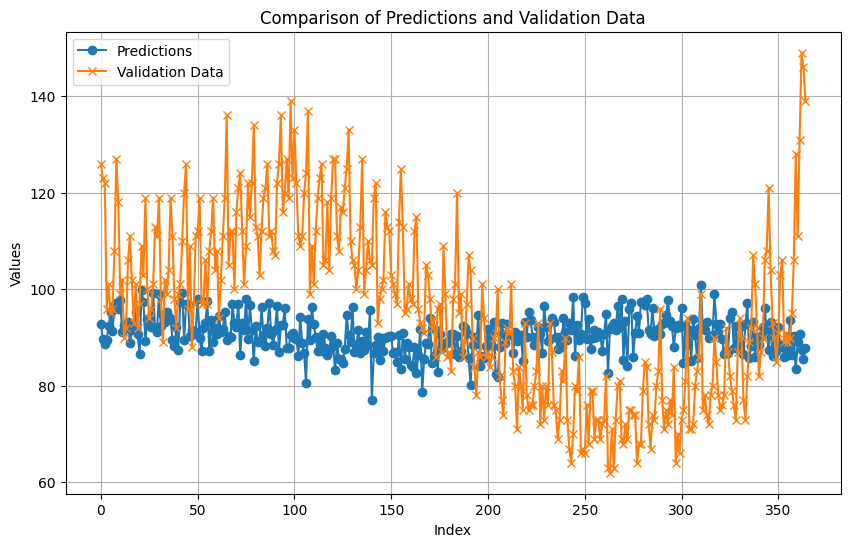

In [44]:
from scalecast.Forecaster import Forecaster
from tensorflow.keras.callbacks import EarlyStopping

mape_list = []
mae_list = []
smape_list = []

grouped_df = train_set.groupby(by=['country','store','product'])
for name, group in tqdm(grouped_df):
    train = group.iloc[:-365]
    test = group.iloc[-365:]   

    f = Forecaster(
        y=train['num_sold'],
        current_dates=train['date']
    )

    f.generate_future_dates(365)
    f.set_estimator('lstm')
    f.set_test_length(365)      


    f.manual_forecast(
        call_me='lstm_best',
        lags=60,
        verbose=False,
        batch_size=64,
        epochs=15,
        validation_split=.2,
        shuffle=True,
        activation='tanh',
        optimizer='Adam',
        lstm_layer_sizes=(72,)*2,
        callbacks=EarlyStopping(
            monitor='val_loss',               
            patience=3,
        ),
        learning_rate=0.001,

        dropout=(0,)*4,
        plot_loss=False
    )

    results = f.export(['lvl_fcsts','model_summaries']) # extract results
    preds = results['lvl_fcsts']['lstm_best']
    y_val = test['num_sold']

    smape_score = smape(preds,y_val.values)
    mae = mean_absolute_error(preds,y_val.values)
    mape = mean_absolute_percentage_error(preds,y_val.values)

    mape_list.append(mape)
    mae_list.append(mae)
    smape_list.append(smape_score)

print("the mean of the smape with linear regression: ",np.mean(smape_list))
print("the mean of the mape with linear regression: ",np.mean(mape_list))
print("the mean of the mae with linear regression: ",np.mean(mae_list))

index = range(len(preds))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(index, preds, label='Predictions', marker='o')
plt.plot(index, y_val, label='Validation Data', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predictions and Validation Data')
plt.legend()
plt.grid(True)
plt.show()


100%|██████████| 75/75 [00:17<00:00,  4.34it/s]


the mean of the smape with linear regression:  32.202143989886146
the mean of the mape with linear regression:  0.4583106670483309
the mean of the mae with linear regression:  2252.680249016191


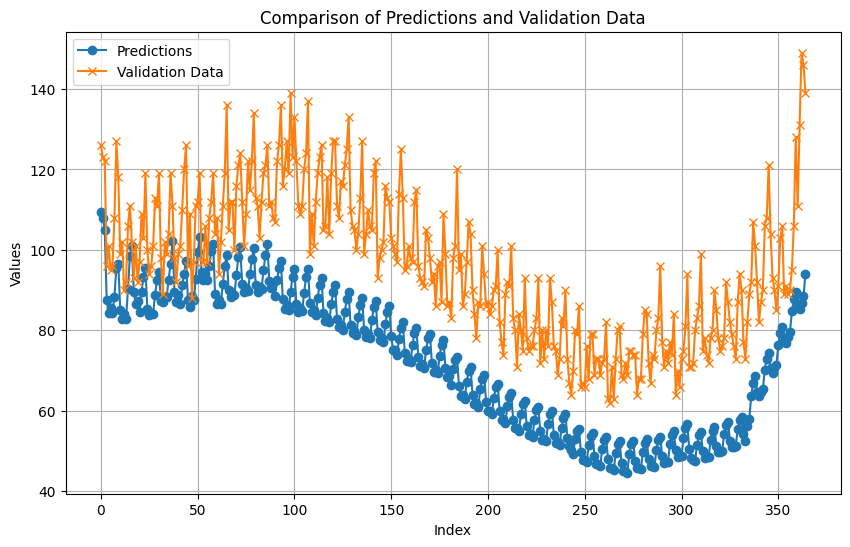

In [42]:
from scalecast.SeriesTransformer import SeriesTransformer

mape_list = []
mae_list = []
smape_list = []

grouped_df = train_set.groupby(by=['country','store','product'])
for name, group in tqdm(grouped_df):
    train = group.iloc[:-365]
    test = group.iloc[-365:]  


    f = Forecaster(
        y=train['num_sold'],
        current_dates=train['date']
    )

    f.generate_future_dates(365)
    f.set_test_length(100)  

    transformer = SeriesTransformer(f)
    f = transformer.DiffTransform()

    f.add_ar_terms(60)
    f.add_seasonal_regressors('month','quarter',dummy=True)
    f.add_seasonal_regressors('year')
    f.add_time_trend()

    f.set_estimator('mlr')
    f.manual_forecast()

    f = transformer.DiffRevert(
        exclude_models = [m for m in f.history if m != 'mlr']
    ) # exclude all lstm models from the revert

    results = f.export(['lvl_fcsts','model_summaries']) # extract results
    preds = results['lvl_fcsts']['mlr']
    y_val = test['num_sold']

    smape_score = smape(preds,y_val.values)
    mae = mean_absolute_error(preds,y_val.values)
    mape = mean_absolute_percentage_error(preds,y_val.values)

    mape_list.append(mape)
    mae_list.append(mae)
    smape_list.append(smape_score)
    

print("the mean of the smape with linear regression: ",np.mean(smape_list))
print("the mean of the mape with linear regression: ",np.mean(mape_list))
print("the mean of the mae with linear regression: ",np.mean(mae_list))


index = range(len(preds))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(index, preds, label='Predictions', marker='o')
plt.plot(index, y_val, label='Validation Data', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predictions and Validation Data')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
from scalecast.Forecaster import Forecaster
from tensorflow.keras.callbacks import EarlyStopping

df_submission = pd.DataFrame()

grouped_df = train_set.groupby(by=['country','store','product'])
for name, group in tqdm(grouped_df):

    f = Forecaster(
        y=group['num_sold'],
        current_dates=group['date']
    )

    f.generate_future_dates(365)
    f.set_estimator('lstm')
    f.set_test_length(365)      


    f.manual_forecast(
        call_me='lstm_best',
        verbose=False,
        lags=60,
        batch_size=64,
        epochs=1,
        validation_split=.2,
        shuffle=True,
        activation='tanh',
        optimizer='Adam',
        lstm_layer_sizes=(72,)*2,
        callbacks=EarlyStopping(
            monitor='val_loss',               
            patience=3,
        ),
        learning_rate=0.001,
        dropout=(0,)*4,
        plot_loss=False
    )

    results = f.export(['lvl_fcsts','model_summaries']) # extract results
    preds = results['lvl_fcsts']
    first_id = group['id'].iloc[-1]+75

    preds['id'] = first_id
    for i in range(1, len(preds)):
        preds.loc[i, 'id'] = preds.loc[i-1, 'id'] + 75
    
    preds.drop(columns=['DATE'],inplace=True)
    preds.rename(columns={'lstm_best':'num_sold'},inplace=True)
    preds = preds.reindex(columns=['id', 'num_sold'])

    df_submission = pd.concat([df_submission, preds])
    break

df_submission = df_submission.sort_values(by='id').reset_index().drop(columns=['index'])

df_submission.to_csv('output.csv')



  0%|          | 0/75 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


  1%|▏         | 1/75 [00:09<11:08,  9.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


  3%|▎         | 2/75 [00:20<12:25, 10.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


  4%|▍         | 3/75 [00:29<11:53,  9.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


  5%|▌         | 4/75 [00:39<11:47,  9.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


  7%|▋         | 5/75 [00:48<11:11,  9.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


  8%|▊         | 6/75 [00:56<10:33,  9.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


  9%|▉         | 7/75 [01:07<10:46,  9.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


 11%|█         | 8/75 [01:17<10:55,  9.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


 12%|█▏        | 9/75 [01:27<10:42,  9.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 13%|█▎        | 10/75 [01:39<11:27, 10.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


 15%|█▍        | 11/75 [01:51<11:38, 10.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 16%|█▌        | 12/75 [02:00<11:03, 10.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


 17%|█▋        | 13/75 [02:14<11:54, 11.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 19%|█▊        | 14/75 [02:28<12:28, 12.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 20%|██        | 15/75 [02:38<11:36, 11.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 21%|██▏       | 16/75 [02:51<11:42, 11.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


 23%|██▎       | 17/75 [03:02<11:16, 11.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


 24%|██▍       | 18/75 [03:15<11:19, 11.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


 25%|██▌       | 19/75 [03:25<10:50, 11.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


 27%|██▋       | 20/75 [03:36<10:13, 11.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


 28%|██▊       | 21/75 [03:45<09:40, 10.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 29%|██▉       | 22/75 [03:55<09:12, 10.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


 31%|███       | 23/75 [04:05<08:48, 10.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 32%|███▏      | 24/75 [04:14<08:28,  9.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


 33%|███▎      | 25/75 [04:24<08:10,  9.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 35%|███▍      | 26/75 [04:32<07:45,  9.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


 36%|███▌      | 27/75 [04:43<07:56,  9.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


 37%|███▋      | 28/75 [04:52<07:32,  9.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


 39%|███▊      | 29/75 [05:00<06:58,  9.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


 40%|████      | 30/75 [05:12<07:23,  9.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


 41%|████▏     | 31/75 [05:25<08:01, 10.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 43%|████▎     | 32/75 [05:33<07:17, 10.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 44%|████▍     | 33/75 [05:44<07:17, 10.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


 45%|████▌     | 34/75 [05:53<06:48,  9.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 47%|████▋     | 35/75 [06:03<06:39,  9.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 48%|████▊     | 36/75 [06:14<06:38, 10.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 49%|████▉     | 37/75 [06:22<06:06,  9.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 51%|█████     | 38/75 [06:33<06:08,  9.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


 52%|█████▏    | 39/75 [06:44<06:12, 10.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 53%|█████▎    | 40/75 [06:53<05:41,  9.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


 55%|█████▍    | 41/75 [07:04<05:46, 10.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


 56%|█████▌    | 42/75 [07:15<05:40, 10.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 57%|█████▋    | 43/75 [07:23<05:11,  9.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


 59%|█████▊    | 44/75 [07:35<05:23, 10.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 60%|██████    | 45/75 [07:45<05:04, 10.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


 61%|██████▏   | 46/75 [07:53<04:44,  9.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


 63%|██████▎   | 47/75 [08:03<04:28,  9.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 64%|██████▍   | 48/75 [08:10<04:05,  9.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 65%|██████▌   | 49/75 [08:18<03:47,  8.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


 67%|██████▋   | 50/75 [08:29<03:51,  9.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 68%|██████▊   | 51/75 [08:38<03:37,  9.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 69%|██████▉   | 52/75 [08:45<03:16,  8.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


 71%|███████   | 53/75 [08:55<03:15,  8.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


 72%|███████▏  | 54/75 [09:02<02:59,  8.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 73%|███████▎  | 55/75 [09:12<02:59,  8.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 75%|███████▍  | 56/75 [09:22<02:53,  9.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 76%|███████▌  | 57/75 [09:29<02:35,  8.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


 77%|███████▋  | 58/75 [09:40<02:36,  9.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


 79%|███████▊  | 59/75 [09:48<02:23,  8.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 80%|████████  | 60/75 [09:56<02:09,  8.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 81%|████████▏ | 61/75 [10:06<02:04,  8.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 83%|████████▎ | 62/75 [10:13<01:50,  8.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


 84%|████████▍ | 63/75 [10:21<01:37,  8.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


 85%|████████▌ | 64/75 [10:30<01:34,  8.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 87%|████████▋ | 65/75 [10:38<01:24,  8.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


 88%|████████▊ | 66/75 [10:46<01:14,  8.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 89%|████████▉ | 67/75 [10:56<01:09,  8.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


 91%|█████████ | 68/75 [11:04<01:00,  8.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


 92%|█████████▏| 69/75 [11:14<00:53,  8.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


 93%|█████████▎| 70/75 [11:25<00:48,  9.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


 95%|█████████▍| 71/75 [11:34<00:37,  9.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 96%|█████████▌| 72/75 [11:43<00:27,  9.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 97%|█████████▋| 73/75 [11:51<00:17,  8.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


 99%|█████████▊| 74/75 [11:58<00:08,  8.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


100%|██████████| 75/75 [12:07<00:00,  9.70s/it]


,id,num_sold
0,136950,30.648496
1,136951,23.830197
2,136952,4.167767
3,136953,21.135252
4,136954,20.551552
...,...,...
27370,164320,439.237990
27371,164321,445.842769
27372,164322,67.965304
27373,164323,363.006402
